Data has been downsampled for visualization.


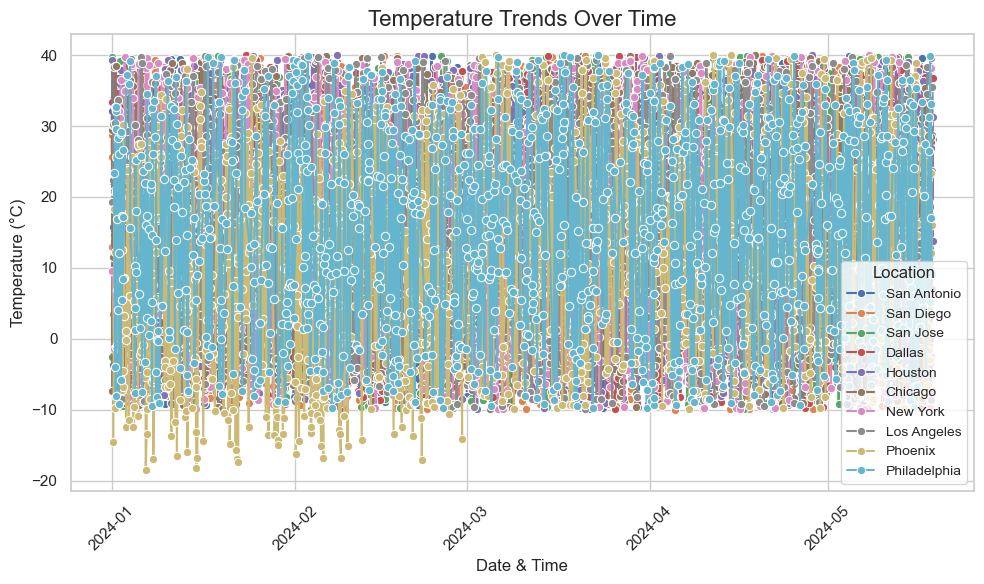

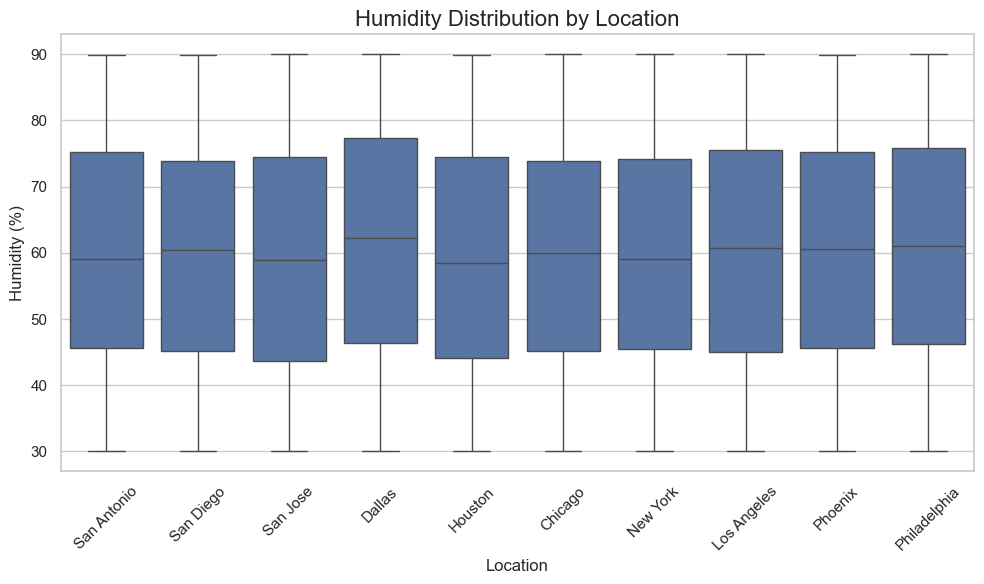

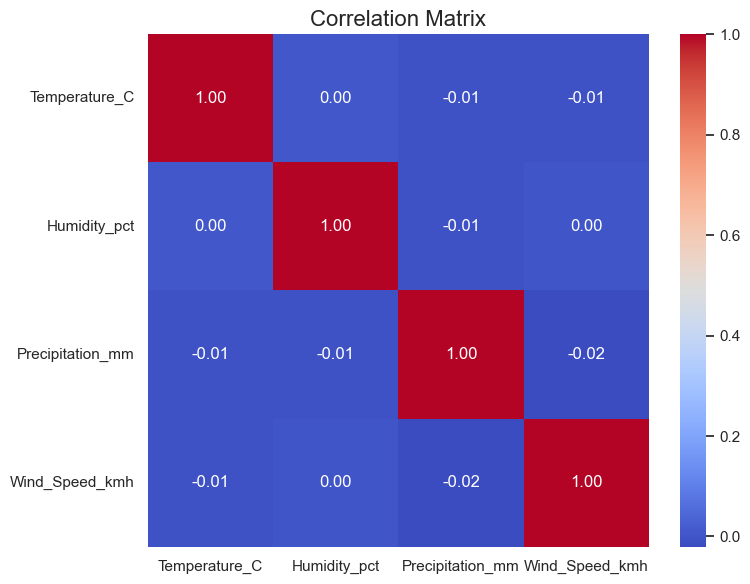

C:\Users\DELL\AppData\Local\Temp\ipykernel_12996\3793616220.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Location', y='Wind_Speed_kmh', ci=None)


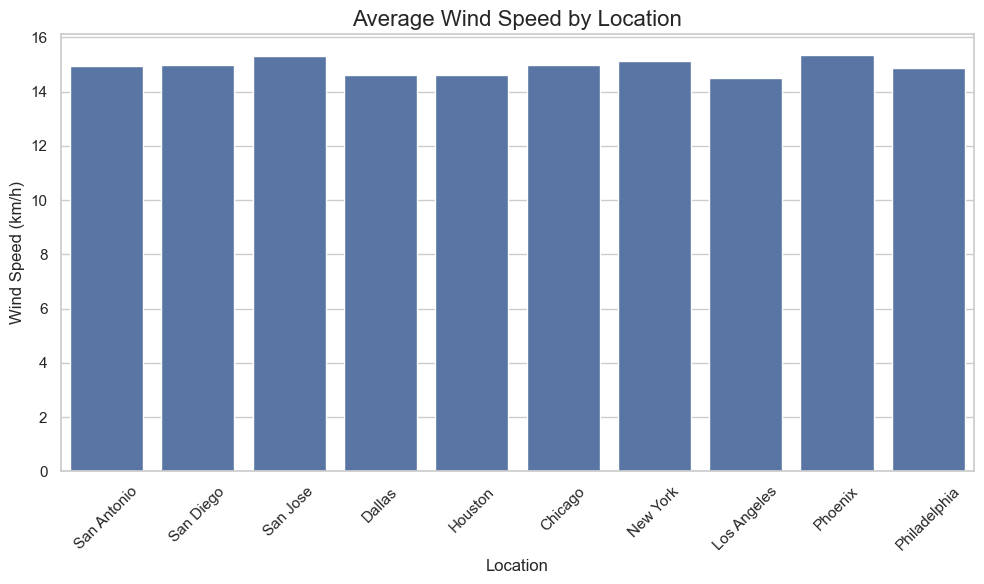

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Read and preprocess the data
def load_and_preprocess_data(file_path):
    """
    Load the weather data and preprocess it for visualization.
    """
    # Load the dataset
    data = pd.read_csv(file_path, parse_dates=['Date_Time'])

    # Ensure necessary columns exist
    required_columns = ['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct', 
                        'Precipitation_mm', 'Wind_Speed_kmh']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Downsample the data for large datasets to optimize rendering
    if len(data) > 10000:
        data = data.sample(10000, random_state=42)
        print("Data has been downsampled for visualization.")

    # Sort data by date for time-series analysis
    data.sort_values('Date_Time', inplace=True)
    
    return data

# Visualize weather trends
def visualize_weather_data(data):
    """
    Create visualizations for weather trends.
    """
    sns.set_theme(style="whitegrid")

    # Plot temperature trends
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Date_Time', y='Temperature_C', hue='Location', marker='o')
    plt.title('Temperature Trends Over Time', fontsize=16)
    plt.xlabel('Date & Time', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.legend(title='Location', fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot humidity distribution
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='Location', y='Humidity_pct')
    plt.title('Humidity Distribution by Location', fontsize=16)
    plt.xlabel('Location', fontsize=12)
    plt.ylabel('Humidity (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(8, 6))
    corr_matrix = data[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Wind speed trends
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='Location', y='Wind_Speed_kmh', ci=None)
    plt.title('Average Wind Speed by Location', fontsize=16)
    plt.xlabel('Location', fontsize=12)
    plt.ylabel('Wind Speed (km/h)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main function to execute the pipeline
def main():
    try:
        file_path = "weather_data.csv"  # Replace with your dataset file path
        weather_data = load_and_preprocess_data(file_path)
        visualize_weather_data(weather_data)
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()


Available Locations:
['Phoenix' 'Houston' 'Los Angeles' 'San Antonio' 'San Diego' 'Dallas'
 'Philadelphia' 'San Jose' 'Chicago' 'New York']


Enter locations to visualize (comma-separated):  Chicago,New York


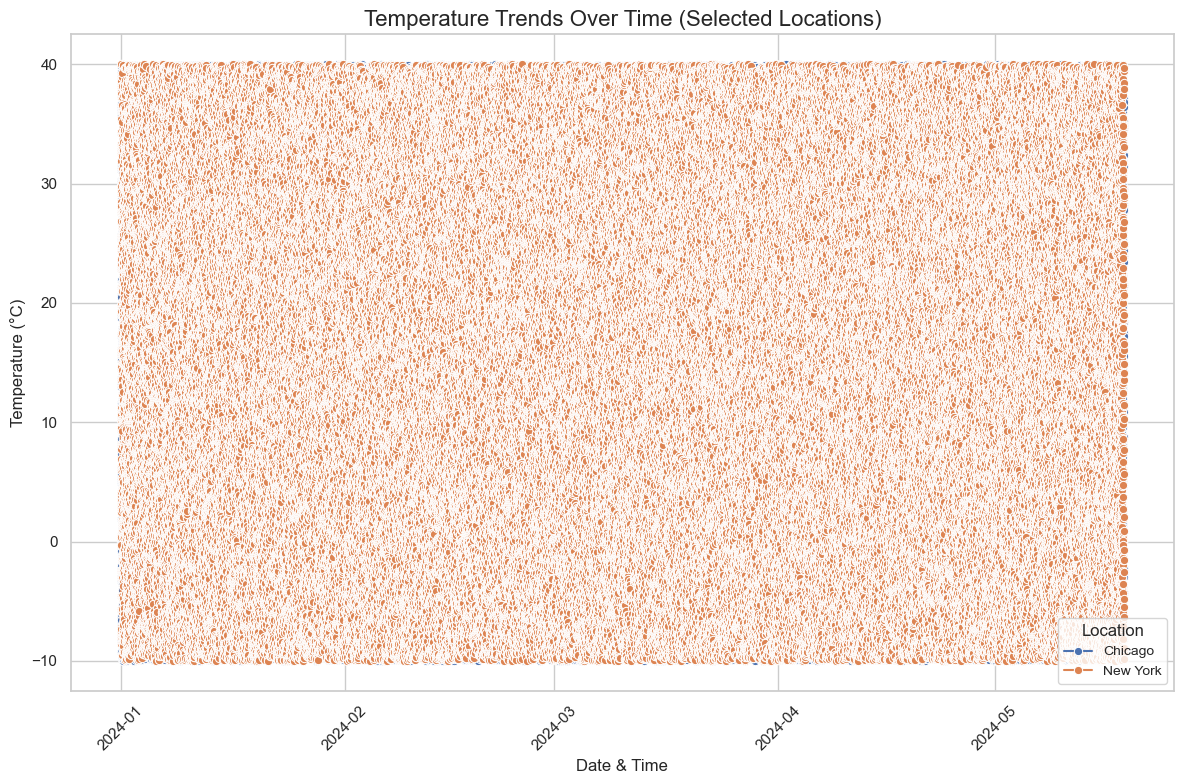

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_preprocess_data(file_path):
    """
    Load and preprocess the weather data for visualization.
    """
    # Load dataset and parse dates
    data = pd.read_csv(file_path, parse_dates=['Date_Time'])
    
    # Validate required columns
    required_columns = ['Location', 'Date_Time', 'Temperature_C']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Sort data by date for time-series analysis
    data.sort_values('Date_Time', inplace=True)
    return data

def filter_data_by_location(data, locations):
    """
    Filter the dataset based on user-selected locations.
    """
    if not locations:
        raise ValueError("No locations provided for filtering.")
    
    filtered_data = data[data['Location'].isin(locations)]
    if filtered_data.empty:
        raise ValueError("No data available for the selected locations.")
    
    return filtered_data

def plot_temperature_trends(data):
    """
    Plot temperature trends over time for selected locations.
    """
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=data, x='Date_Time', y='Temperature_C', hue='Location', marker='o')
    plt.title('Temperature Trends Over Time (Selected Locations)', fontsize=16)
    plt.xlabel('Date & Time', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.legend(title='Location', fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    try:
        file_path = "weather_data.csv"  # Replace with the path to your dataset
        weather_data = load_and_preprocess_data(file_path)
        
        # Get user input for locations
        print("Available Locations:")
        print(weather_data['Location'].unique())
        selected_locations = input("Enter locations to visualize (comma-separated): ").split(',')
        selected_locations = [loc.strip() for loc in selected_locations]
        
        # Filter data by user-selected locations
        filtered_data = filter_data_by_location(weather_data, selected_locations)
        
        # Plot temperature trends for selected locations
        plot_temperature_trends(filtered_data)
    
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()
